**NAME: JUBILEE AMECHI**

**TASK: Predicting Customer Buying Behaviour**

** **

**Step 1: Load and Explore the Data**

In [11]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To Load the dataset
file_path = "Downloads/customer_booking.csv"  
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# To Display basic info
df.info()

# To Show first five rows
df.head()

# Checking for missing values
print(df.isnull().sum())

# Summarizing statistics of numerical features
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


**Step 2: Data Preprocessing & Feature Engineering**

In [13]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder from sklearn.preprocessing 

# To encode categorical variables
label_encoders = {}
categorical_cols = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # To Store encoders for inverse transformation if needed

# Defining features (X) and target (y)
X = df.drop(columns=["booking_complete"])
y = df["booking_complete"]

# Spliting the dataset into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((40000, 13), (10000, 13), (40000,), (10000,))

**Step 3: Training a Random Forest Model**

Accuracy: 0.8562

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



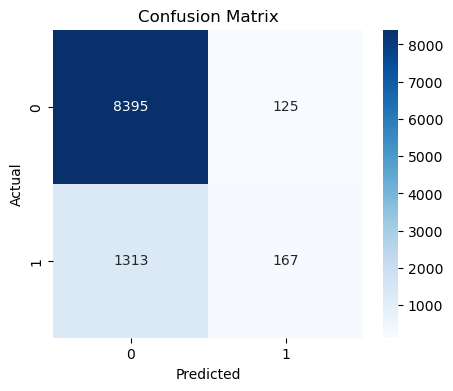

In [35]:
from sklearn.ensemble import RandomForestClassifier   # To import RandomForestClassifier from sklearn.ensemble
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix   # To import classification_report, accuracy_score, confusion_matrix from sklearn.metrics

# To train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# To make predictions
y_pred = model.predict(X_test)

# Evaluating model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# To display confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("Confusion_matrix.Png")   # To save as an image 
plt.show()

**Step 4: Featuring Importance Analysis**

C:\Users\Hp\AppData\Local\Temp\ipykernel_9564\73203886.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")


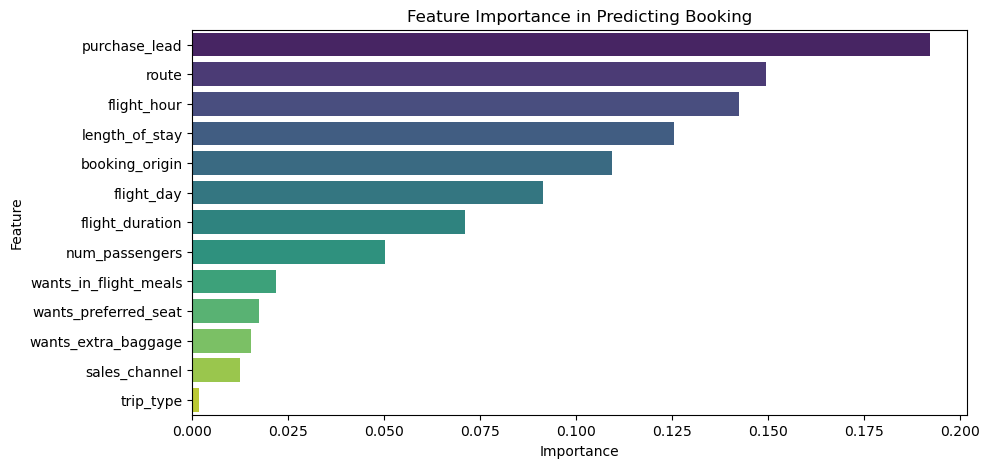

In [33]:
# To get feature importance
feature_importances = pd.DataFrame(
    {"Feature": X.columns, "Importance": model.feature_importances_}
).sort_values(by="Importance", ascending=False)

# Ploting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance in Predicting Booking")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("Predicting_booking.Png")  # To save as an image
plt.show()